In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pickle

In [2]:
df = pd.read_excel('C:/Users/Администратор/Desktop/Учеба КФУ/Диплом/ИАД/table_new_2.xlsx')

In [3]:
df.shape

(11974, 12)

In [4]:
df1=df._get_numeric_data()

In [5]:
df2= df1.fillna(0)

In [6]:
df2.head(5)

,Сводный индикатор,"2020, Внеоборотные активы, RUB","2020, Оборотные активы, RUB","2020, Активы всего, RUB","2020, Уставный капитал , RUB","2020, Капитал и резервы, RUB","2020, Долгосрочные обязательства, RUB","2020, Краткосрочные обязательства, RUB","2020, Выручка, RUB","2020, Чистая прибыль (убыток), RUB"
0,0,0.0,1.845000e+06,1.845000e+06,0.0,1701000.0,0.0,1.440000e+05,4.423000e+06,1302000.0
1,0,0.0,1.900000e+06,1.900000e+06,10000.0,1584000.0,0.0,3.160000e+05,1.029200e+07,1479000.0
2,0,2666000.0,1.055700e+07,1.322300e+07,0.0,4015000.0,0.0,9.208000e+06,9.333800e+07,3085000.0
3,1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
4,0,4444000.0,4.405974e+09,4.410418e+09,10000.0,15731000.0,16161000.0,4.378526e+09,3.468473e+09,1368000.0


In [7]:
df3 = df2.astype(int)

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11974 entries, 0 to 11973
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Сводный индикатор                       11974 non-null  int32
 1   2020, Внеоборотные активы, RUB          11974 non-null  int32
 2   2020, Оборотные активы, RUB             11974 non-null  int32
 3   2020, Активы  всего, RUB                11974 non-null  int32
 4   2020, Уставный капитал , RUB            11974 non-null  int32
 5   2020, Капитал и резервы, RUB            11974 non-null  int32
 6   2020, Долгосрочные обязательства, RUB   11974 non-null  int32
 7   2020, Краткосрочные обязательства, RUB  11974 non-null  int32
 8   2020, Выручка, RUB                      11974 non-null  int32
 9   2020, Чистая прибыль (убыток), RUB      11974 non-null  int32
dtypes: int32(10)
memory usage: 467.9 KB


In [9]:
target_variable_name = 'Сводный индикатор'
training_values = df3[target_variable_name]
training_points = df3.drop(target_variable_name, axis=1)

In [10]:
X, y = training_points, training_values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
first_tree = DecisionTreeClassifier()

In [17]:
first_tree.fit =first_tree.fit(X_train, y_train)
first_tree.fit

DecisionTreeClassifier()

In [15]:
pred4 = first_tree.predict(X_test)
pred4

array([0, 1, 1, ..., 0, 1, 1])

In [18]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, pred4)
score

0.8408015585861397

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [22]:
fpr, tpr, treshold = roc_curve(y_test, pred4)
roc_auc = auc(fpr, tpr)

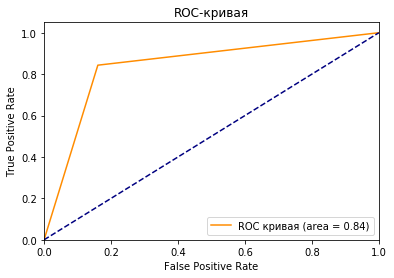

In [23]:
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [24]:
from sklearn.metrics import precision_score

In [26]:
precision = precision_score(y_test, pred4)
precision

0.751696065128901

In [27]:
from sklearn.metrics import recall_score

In [29]:
recall = recall_score(y_test, pred4)
recall

0.8432267884322678

In [30]:
auc = roc_auc_score(y_test, pred4)
auc

0.8413150177352214

In [28]:
from sklearn.metrics import f1_score

In [32]:
f1_score = f1_score(y_test, pred4)
f1_score

0.7948350071736012

In [33]:
a=(2*(precision*recall))/(precision+recall)
a

0.7948350071736012

In [10]:
sm = SMOTE()

In [11]:
X, y = sm.fit_resample(training_points, training_values)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
first_tree = DecisionTreeClassifier()

In [23]:
first_tree.fit =first_tree.fit(X_train, y_train)
first_tree.fit

DecisionTreeClassifier()

In [24]:
pred4 = first_tree.predict(X_test)
pred4

array([0, 0, 0, ..., 1, 0, 1])

In [26]:
fpr, tpr, treshold = roc_curve(y_test, pred4)
roc_auc = auc(fpr, tpr)

In [27]:
auc = roc_auc_score(y_test, pred4)
auc

0.857968817669987

In [29]:
f1_score = f1_score(y_test, pred4)
f1_score

0.8627286104687828

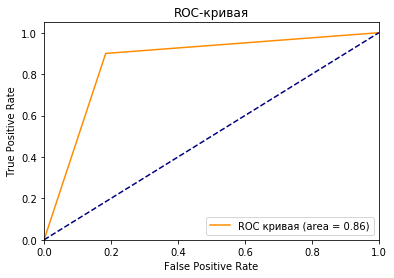

In [30]:
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()